# Introduction to Machine Learning


In the time it took you to read this sentence, terabytes of data have been collectively generated across the world — more data than any of us could ever hope to process, much less make sense of, on the machines we're using to read this notebook.

In response to this massive influx of data, the field of Data Science has come to the forefront in the past decade. Cobbled together by people from a diverse array of fields — statistics, physics, computer science, design, and many more — the field of Data Science represents our collective desire to understand and harness the abundance of data around us to build a better world.

In this notebook, I'm going to go over a basic Python data analysis pipeline from start to finish to show you what a typical data science workflow looks like.
In addition to providing code examples, I also hope to imbue in you a sense of good practices so you can be a more effective — and more collaborative — data scientist.

## Packages

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are

* NumPy: Provides a fast numerical array structure and helper functions.
* pandas: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* scikit-learn: The essential Machine Learning package in Python.
* matplotlib: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* Seaborn: Advanced statistical plotting library.

## Roadmap
Typical workflow for machine learning looks like this

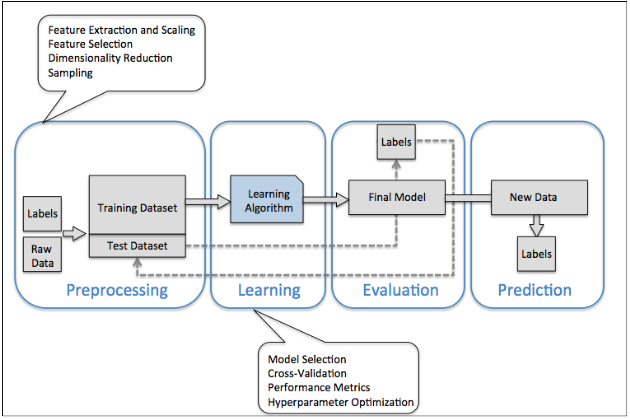

In [4]:
Image(filename='/Users/puneet/Desktop/Screen Shot 2017-05-28 at 9.27.48 PM.png')

## Preprocessing - getting data into shape

Raw data rarely comes in the form and shape that is necessary for the optimal performance of the learning algorithm. Thus the preprocessing of the data is one of the most crucial steps in any machine learning algorithm.

* Extracting features out of images.
* Converting categorical values to numerical values.
* Filling the missing values


# Regression

We will generate a one-dimensional dataset with a simple model (including some noise), and we will try to fit a function to this data. With this function, we can predict values on new data points. This is a curve-fitting regression problem.

In [9]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
f = lambda x: np.exp(3 * x)

In [21]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

Lets add some random noise

In [12]:
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x))


Lets plot our datapoints

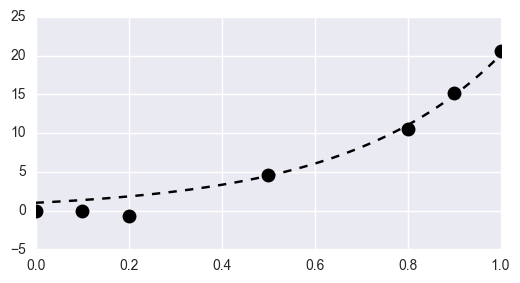

In [13]:
plt.figure(figsize=(6,3))
plt.plot(x_tr[:100],y_tr[:100],'--k')
plt.plot(x, y, 'ok', ms=10)

Now we use Machine Learning to fit a linear model to the data. There are three steps
* Create the model
* Fit the model
* Predict the values

In [14]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])

/Users/puneet/Envs/venv/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


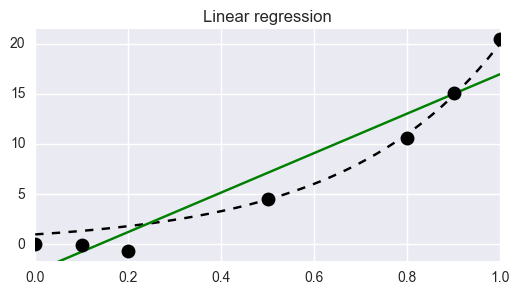

In [15]:
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_tr, y_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.xlim(0, 1);
plt.ylim(y.min()-1, y.max()+1);
plt.title("Linear regression");

As we can see that linear fit is not well adapted. Since the datapoints are generated using non-linear model. Therefore we are now going to fit a non-linear model.

25.87 -6.17 0.00
98.04 -168.35 69.26 31.18 -9.59 0.00


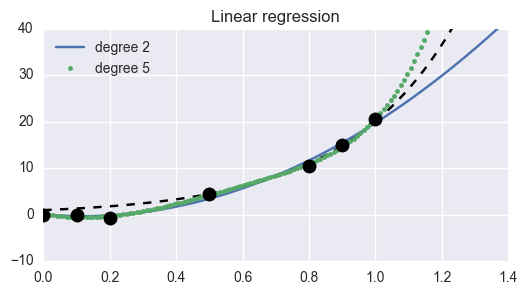

In [16]:
lrp = lm.LinearRegression()
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg, s in zip([2, 5], ['-', '.']):
    lrp.fit(np.vander(x, deg + 1), y);
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_lrp, s, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.4);
    plt.ylim(-10, 40);
    # Print the model's coefficients.
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10);
plt.title("Linear regression");

Polynomial of degree 5 fits precisely while degree 2 does not.

## AMES housing

In [27]:
from sklearn.datasets import load_boston
boston = load_boston()

In [31]:
boston.data.shape

(506, 13)

In [32]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [33]:
print boston.feature_names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


As we can see, we have 506 instances ( rows ) and 13 attributes or parameters. Goal of this exercise is to predict the housing prices in boston region using the features given.

In [34]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [35]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [37]:
# Replacing columns with relevant names
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [39]:
boston.target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [40]:
bos['PRICE'] = boston.target

In [41]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Making the model

In [43]:
from sklearn.linear_model import LinearRegression
x = bos.drop('PRICE', axis=1)
lm = LinearRegression()

# Fitting the model

In [44]:
lm.fit(x, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
# Lets look at the model
print 'Estimated intercept coefficient', lm.intercept_

Estimated intercept coefficient 36.4911032804


In [46]:
print 'Number of coefficients' , len(lm.coef_)

Number of coefficients 13


Constructing a data frame that contains features and estimated coefficients

In [48]:
pd.DataFrame(zip(x.columns, lm.coef_), columns = ['Features', 'Estimated cofficients'])

,Features,Estimated cofficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


As we can see that house price has high correlation with RM. 

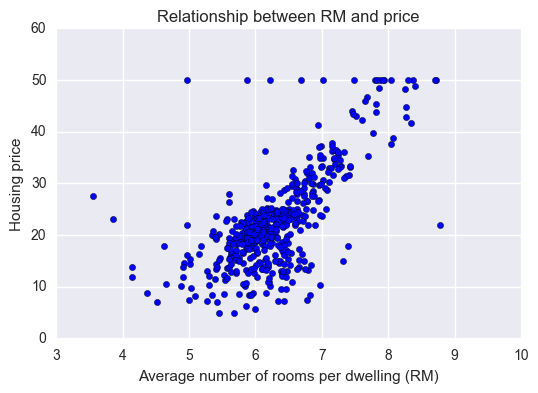

In [49]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing price")
plt.title("Relationship between RM and price")
plt.show()

# Predicting values

In [50]:
lm.predict(x)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

How much difference is there between predicted price and actual price

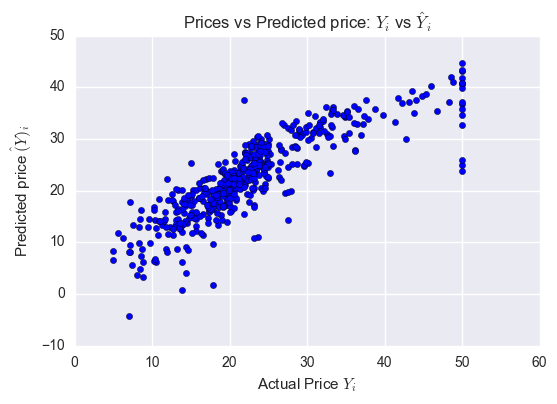

In [53]:
plt.scatter(bos.PRICE, lm.predict(x))
plt.xlabel("Actual Price $Y_i$")
plt.ylabel("Predicted price $\hat(Y)_i$")
plt.title("Prices vs Predicted price: $Y_i$ vs $\hat{Y}_i $")

We can notice that there is some error in predicting the house price

Let's calculate mean squared error

In [55]:
msefull = np.mean((bos.PRICE - lm.predict(x))** 2)
msefull

21.89777921768749

If we had taken only one predictor then error would have been very high

In [57]:
lm = LinearRegression()
lm.fit(x[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(x[['PTRATIO']]))**2)
msePTRATIO

62.65220001376927

## Train & Test split


In [62]:
import sklearn
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(x, bos.PRICE, test_size=0.33, random_state=5)

In [64]:
print X_train.shape
print X_test.shape

(339, 13)
(167, 13)


Lets build a model

In [65]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test  =  lm.predict(X_test)

Mean squared error for training and test data

In [66]:
print ' training error ' ,np.mean((Y_train - lm.predict(X_train))**2)
print ' testing error ', np.mean((Y_test - lm.predict(X_test))**2)

 training error  19.5467584735
 testing error  28.5413672756


In [68]:
# Residual plots

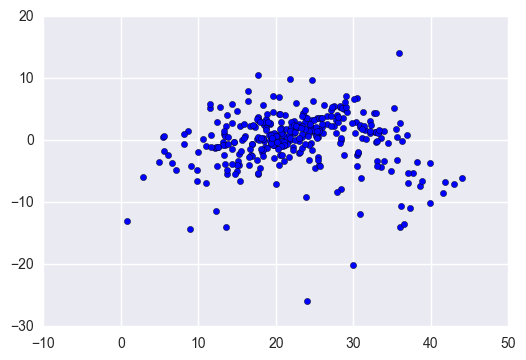

In [69]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train)